Spanish Word Embeddings: [link](https://github.com/dccuchile/spanish-word-embeddings?tab=readme-ov-file)

Word vectors for 157 languages: [link](https://fasttext.cc/docs/en/crawl-vectors.html)

In [1]:
# Para manipulación de datos y operaciones numéricas
import numpy as np
# Para vectorización y modelos de Machine Learning
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
# Para evaluación
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
# Para visualización (opcional, para la matriz de confusión)
import matplotlib.pyplot as plt

print("Librerías principales importadas.")

Librerías principales importadas.


In [2]:
# Demostración: CountVectorizer (Bag-of-Words) vs TfidfVectorizer

# Corpus de ejemplo (textos cortos en español)
corpus = [
    "qué bueno está el mate amargo",
    "el mate dulce no me va",
    "qué amargo está este mate che",
    "me gusta el mate bien caliente"
]

In [3]:
# 1. Usando CountVectorizer (Bolsa de Palabras simple)
print("--- CountVectorizer (BoW) ---")
count_vectorizer = CountVectorizer()
bow_matrix = count_vectorizer.fit_transform(corpus)

# Mostramos el vocabulario (las "features")
print("Vocabulario (Features):")
print(count_vectorizer.get_feature_names_out())

# Mostramos la matriz BoW (dispersa)
print("\nMatriz BoW (Documento x Palabra):")
print(bow_matrix.toarray()) # .toarray() para verla densa (cuidado con corpus grandes)
print("-" * 30)

--- CountVectorizer (BoW) ---
Vocabulario (Features):
['amargo' 'bien' 'bueno' 'caliente' 'che' 'dulce' 'el' 'este' 'está'
 'gusta' 'mate' 'me' 'no' 'qué' 'va']

Matriz BoW (Documento x Palabra):
[[1 0 1 0 0 0 1 0 1 0 1 0 0 1 0]
 [0 0 0 0 0 1 1 0 0 0 1 1 1 0 1]
 [1 0 0 0 1 0 0 1 1 0 1 0 0 1 0]
 [0 1 0 1 0 0 1 0 0 1 1 1 0 0 0]]
------------------------------


In [4]:
# 2. Usando TfidfVectorizer
print("\n--- TfidfVectorizer ---")
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

# El vocabulario es el mismo (si no cambiamos parámetros)
# print("Vocabulario (Features):") # Ya lo mostramos arriba
# print(tfidf_vectorizer.get_feature_names_out())

# Mostramos la matriz TF-IDF
print("Matriz TF-IDF (Documento x Palabra):")
print(tfidf_matrix.toarray())
print("-" * 30)

# --- Observaciones ---
# Nota 1: Compara los valores de palabras comunes como 'mate', 'el', 'está'.
#         En BoW son solo cuentas. En TF-IDF, su peso se ajusta por la frecuencia
#         inversa en los documentos (IDF). Palabras más 'distintivas' de un
#         documento (ej. 'dulce', 'caliente', 'che') tienden a tener mayor peso TF-IDF
#         relativo que palabras muy comunes en *todo* el corpus.
# Nota 2: Ambas matrices son 'dispersas' (muchos ceros).


--- TfidfVectorizer ---
Matriz TF-IDF (Documento x Palabra):
[[0.41876949 0.         0.53115599 0.         0.         0.
  0.33902999 0.         0.41876949 0.         0.27717923 0.
  0.         0.41876949 0.        ]
 [0.         0.         0.         0.         0.         0.48216873
  0.30776206 0.         0.         0.         0.25161565 0.38014737
  0.48216873 0.         0.48216873]
 [0.38761905 0.         0.         0.         0.49164562 0.
  0.         0.49164562 0.38761905 0.         0.25656108 0.
  0.         0.38761905 0.        ]
 [0.         0.48216873 0.         0.48216873 0.         0.
  0.30776206 0.         0.         0.48216873 0.25161565 0.38014737
  0.         0.         0.        ]]
------------------------------


In [5]:
# --- Demostración: Añadiendo N-Gramas a TF-IDF ---

print("\n--- TfidfVectorizer con N-Gramas (bigramas) ---")

# Usamos el mismo corpus de antes
# Creamos un nuevo vectorizador, ahora especificando ngram_range
# ngram_range=(1, 2) significa: usa unigramas (palabras solas) Y bigramas (pares de palabras)
tfidf_ngram_vectorizer = TfidfVectorizer(ngram_range=(1, 2))
tfidf_ngram_matrix = tfidf_ngram_vectorizer.fit_transform(corpus)

# Mostramos el NUEVO vocabulario, que ahora incluye bigramas
print("Vocabulario con unigramas y bigramas:")
print(tfidf_ngram_vectorizer.get_feature_names_out())

# Mostramos la nueva matriz TF-IDF (será más ancha)
print("\nMatriz TF-IDF con N-Gramas:")
print(tfidf_ngram_matrix.toarray())
print("-" * 30)

# --- Observaciones ---
# Nota 1: Fíjate cómo aparecen términos como "mate amargo", "qué bueno", "no me", etc.
#         Estos bigramas capturan un poco del contexto local y pueden ser features
#         muy útiles para los modelos. Por ejemplo, 'amargo' solo y 'mate amargo'
#         aportan información diferente.
# Nota 2: El número de features (columnas) aumenta considerablemente.


--- TfidfVectorizer con N-Gramas (bigramas) ---
Vocabulario con unigramas y bigramas:
['amargo' 'amargo está' 'bien' 'bien caliente' 'bueno' 'bueno está'
 'caliente' 'che' 'dulce' 'dulce no' 'el' 'el mate' 'este' 'este mate'
 'está' 'está el' 'está este' 'gusta' 'gusta el' 'mate' 'mate amargo'
 'mate bien' 'mate che' 'mate dulce' 'me' 'me gusta' 'me va' 'no' 'no me'
 'qué' 'qué amargo' 'qué bueno' 'va']

Matriz TF-IDF con N-Gramas:
[[0.27958703 0.         0.         0.         0.35462069 0.35462069
  0.         0.         0.         0.         0.22634979 0.22634979
  0.         0.         0.27958703 0.35462069 0.         0.
  0.         0.18505579 0.35462069 0.         0.         0.
  0.         0.         0.         0.         0.         0.27958703
  0.         0.35462069 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.33886174 0.33886174 0.21629106 0.21629106
  0.         0.         0.         0.         0.         0.
  0.         0.

Textos de entrenamiento: 4
Textos de prueba: 2
------------------------------

Entrenando el Pipeline (TF-IDF + Naive Bayes)...
Entrenamiento completado.
------------------------------

Realizando predicciones sobre el conjunto de prueba...
Predicciones: [0 0]
Etiquetas Reales: [1 1]
------------------------------

--- Evaluación del Modelo (Naive Bayes) ---
              precision    recall  f1-score   support

Negativo (0)       0.00      0.00      0.00       0.0
Positivo (1)       0.00      0.00      0.00       2.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0


Matriz de Confusión:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

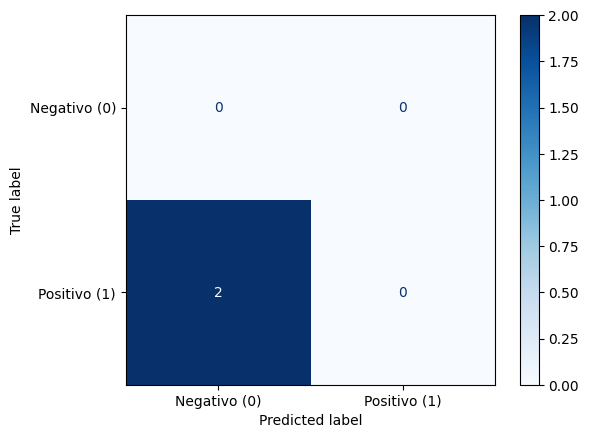

In [6]:
# --- Demostración: Pipeline de Clasificación y Evaluación ---

# 1. Datos de Ejemplo (Simples, para clasificación binaria: Positivo/Negativo)
textos = [
    "La milanesa a caballo estaba espectacular!", # Positivo
    "Qué buena onda la atención en el bar.",     # Positivo
    "El flan con dulce de leche es lo más.",    # Positivo
    "El bife de chorizo llegó frío y duro.",     # Negativo
    "Mucho quilombo, tardaron una banda en traer la cuenta.", # Negativo
    "La verdad, la pizza dejaba bastante que deseear.", # Negativo
]
# Etiquetas: 1 para Positivo, 0 para Negativo
labels = np.array([1, 1, 1, 0, 0, 0])

# 2. Dividir datos en Entrenamiento y Prueba
X_train, X_test, y_train, y_test = train_test_split(textos, labels, test_size=0.33, random_state=42)
# test_size=0.33 significa que ~1/3 va para prueba. random_state para reproducibilidad.

print(f"Textos de entrenamiento: {len(X_train)}")
print(f"Textos de prueba: {len(X_test)}")
print("-" * 30)

# 3. Crear y Entrenar un Pipeline (TF-IDF + Naive Bayes)
# El Pipeline encadena pasos: primero vectoriza, luego clasifica.
pipeline_nb = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,1))), # Usamos solo unigramas aquí por simplicidad
    ('clf', MultinomialNB()) # Clasificador Naive Bayes Multinomial
])

print("\nEntrenando el Pipeline (TF-IDF + Naive Bayes)...")
# Entrenamos el pipeline COMPLETO con los datos de texto CRUDOS de entrenamiento
pipeline_nb.fit(X_train, y_train)
print("Entrenamiento completado.")
print("-" * 30)

# 4. Realizar Predicciones sobre los datos de Prueba
print("\nRealizando predicciones sobre el conjunto de prueba...")
y_pred_nb = pipeline_nb.predict(X_test)

print(f"Predicciones: {y_pred_nb}")
print(f"Etiquetas Reales: {y_test}")
print("-" * 30)

# 5. Evaluar el Modelo
print("\n--- Evaluación del Modelo (Naive Bayes) ---")
print(classification_report(y_test, y_pred_nb, target_names=['Negativo (0)', 'Positivo (1)']))

# Matriz de Confusión
print("\nMatriz de Confusión:")
cm_nb = confusion_matrix(y_test, y_pred_nb)
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=['Negativo (0)', 'Positivo (1)'])
disp_nb.plot(cmap=plt.cm.Blues)
plt.show() # Muestra el gráfico

# --- Observaciones ---
# Nota 1: El Pipeline simplifica enormemente el flujo. Entrenamos con texto crudo,
#         predice con texto crudo. La vectorización ocurre dentro del pipeline.
# Nota 2: El 'classification_report' es CLAVE. Muestra Precision, Recall y F1-Score
#         para cada clase. Fijarse si el modelo funciona igual de bien para ambas.
#         'support' indica cuántas muestras de cada clase había en el test set.
# Nota 3: La Matriz de Confusión ayuda a ver *dónde* se equivoca.
#         Diagonal principal = Aciertos. Fuera de la diagonal = Errores.
#         (Fila = Real, Columna = Predicción)

In [7]:
!pip install --upgrade numpy scipy gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 55.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 17.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.2
    Uninstalling scipy-1.15.2:
      Successfully uninstalled scipy-1.15.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the f

In [8]:
!pip uninstall gensim -y # Remove the existing gensim installation
!pip install gensim # Reinstall gensim to align with the NumPy version
# Restart the kernel to ensure the changes take effect

Found existing installation: gensim 4.3.3
Uninstalling gensim-4.3.3:
  Successfully uninstalled gensim-4.3.3
  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)


In [2]:
import gensim.downloader as api
from gensim.models import KeyedVectors

In [3]:
# List available models to find the correct name
print(api.info()['models'].keys())

dict_keys(['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis'])


In [4]:
model_name = 'fasttext-wiki-news-subwords-300'
word_vectors = api.load(model_name)

[==================================================] 100.0% 958.5/958.4MB downloaded


In [5]:
print(f"Modelo cargado. Vocabulario: {len(word_vectors.index_to_key)} palabras.")
modelo_cargado = True

Modelo cargado. Vocabulario: 999999 palabras.


In [6]:
if modelo_cargado:
    # a) Obtener el vector de una palabra
    try:
        vector_auto = word_vectors['auto']
        print(f"Vector para 'auto' (primeros 10 de {len(vector_auto)} dimensiones):")
        print(vector_auto[:10])
        print(f"Forma del vector: {vector_auto.shape}") # Debería ser (300,) si usas SBWC de 300d
    except KeyError:
        print("La palabra 'auto' no está en el vocabulario.")
    print("-" * 30)

Vector para 'auto' (primeros 10 de 300 dimensiones):
[ 0.050735 -0.026908  0.11211   0.042649 -0.093272 -0.077388 -0.07398
 -0.12486   0.13714  -0.049054]
Forma del vector: (300,)
------------------------------


In [15]:
# b) Encontrar palabras similares (similitud coseno)
try:
  similares_mate = word_vectors.most_similar('elefante', topn=10)
  print("Palabras más similares a 'elefante':")
  for palabra, score in similares_mate:
    print(f"- {palabra}: {score:.5f}") # Muestra la palabra y su puntaje de similitud
except KeyError:
  print("La palabra 'elefante' no está en el vocabulario.")
print("-" * 30)

Palabras más similares a 'elefante':
- comúnmente: 0.78848
- rampante: 0.77540
- montante: 0.77500
- elegante: 0.76865
- passante: 0.76034
- garante: 0.75930
- dando: 0.75914
- pesante: 0.75744
- diante: 0.75449
- charmante: 0.75447
------------------------------


In [26]:
# c) Realizar analogías vectoriales (el famoso ejemplo rey/reina)
try:
  analogia = word_vectors.most_similar(positive=['casa', 'edificio'], negative=['carpa'], topn=2)
  print("Analogía: rey - varón + mujer ≈ ???")
  print(f"Resultado más probable: {analogia[0][0]} (Score: {analogia[0][1]:.4f})")
except KeyError as e:
  print(f"Error en la analogía: Falta la palabra '{e.args[0]}' en el vocabulario.")
print("-" * 30)

Analogía: rey - varón + mujer ≈ ???
Resultado más probable: caso (Score: 0.5817)
------------------------------
